# Mushrooms Classification

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import layers
from tensorflow.data.experimental import make_csv_dataset
import pandas as pd
from keras.utils import FeatureSpace

## Load Data

In [3]:
df = pd.read_csv('mushroom.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## Properties

In [5]:
df.shape

(8124, 23)

In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## EDA

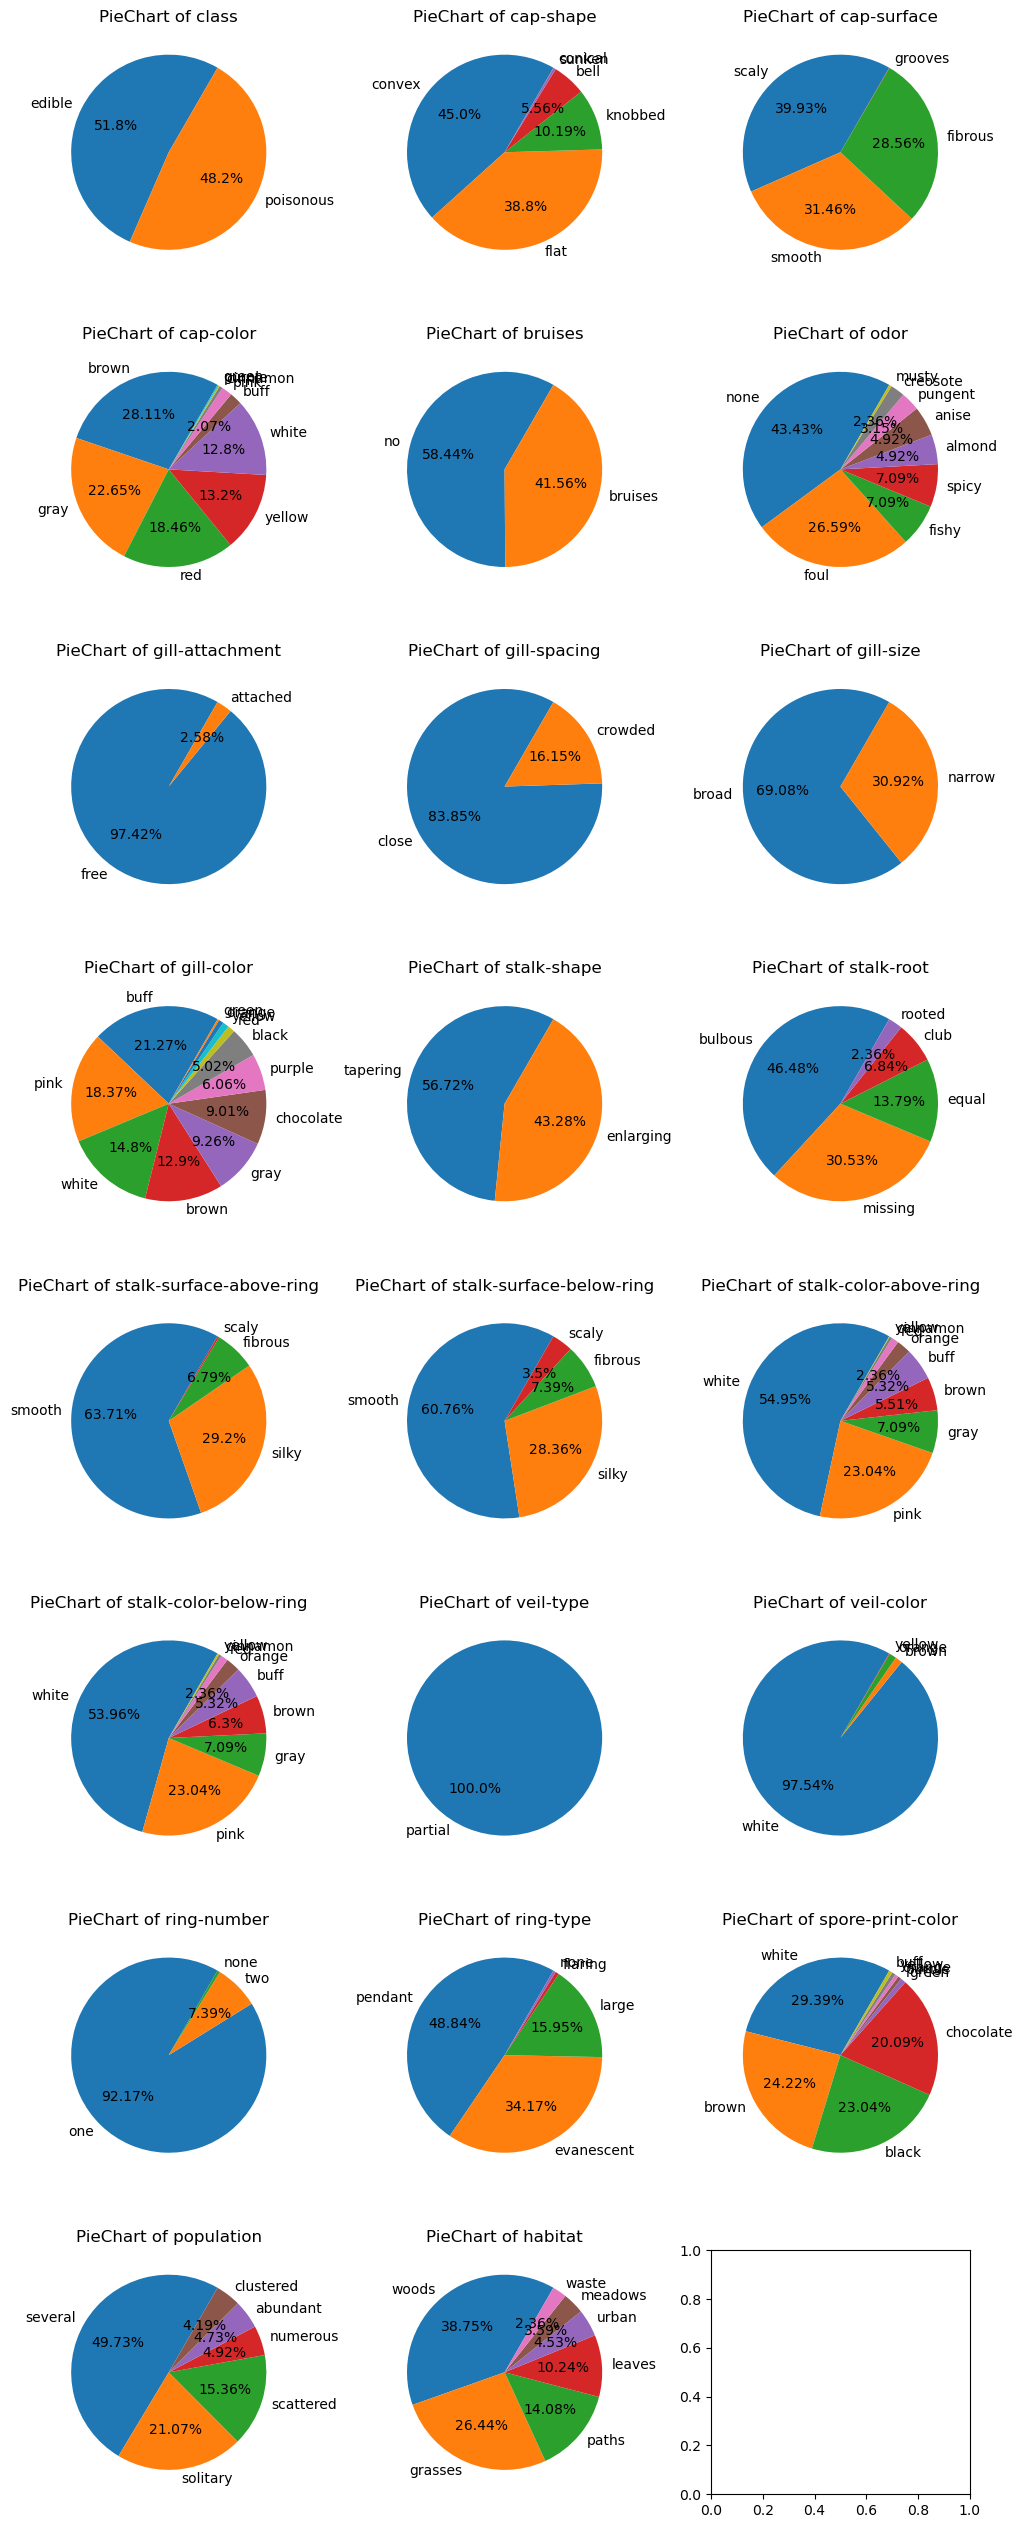

In [11]:
n_cols = 3
n_rows = np.int64(np.ceil(len(df.columns)/n_cols))

plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i, col in enumerate(df.columns):
    value_count_dictionary = dict(df[col].value_counts())
    plt.subplot(n_rows, n_cols, i+1)
    plt.pie(x=value_count_dictionary.values(), labels=value_count_dictionary.keys(), autopct=lambda x: f'{np.round(x, 2)}%' if x > 2 else '', 
            startangle=60)
    plt.axis('off')
    plt.title(f'PieChart of {col}')

plt.show()

## DF to DS

In [13]:
df = df.astype('string')

In [15]:
ds = make_csv_dataset(
    'mushroom.csv',
    batch_size=32,
    label_name='class',
    shuffle_buffer_size=len(df),
    shuffle_seed=42,
    shuffle=True,
    num_epochs=1
)

In [17]:
train_size = np.ceil(len(df)*.8)
train_ds = ds.take(train_size)
valid_ds = ds.skip(train_size)

## Configure FeatureSpace

In [19]:
featurespace = FeatureSpace(
    features={
        'cap-shape': FeatureSpace.string_categorical(num_oov_indices=0),
        'cap-surface': FeatureSpace.string_categorical(num_oov_indices=0),
        'cap-color': FeatureSpace.string_categorical(num_oov_indices=0),
        'bruises': FeatureSpace.string_categorical(num_oov_indices=0),
        'odor': FeatureSpace.string_categorical(num_oov_indices=0),       
        'gill-attachment': FeatureSpace.string_categorical(num_oov_indices=0),
        'gill-spacing': FeatureSpace.string_categorical(num_oov_indices=0),
        'gill-size': FeatureSpace.string_categorical(num_oov_indices=0),
        'gill-color': FeatureSpace.string_categorical(num_oov_indices=0),        
        'stalk-shape': FeatureSpace.string_categorical(num_oov_indices=0),
        'stalk-root': FeatureSpace.string_categorical(num_oov_indices=0),
        'stalk-surface-above-ring': FeatureSpace.string_categorical(num_oov_indices=0),        
        'stalk-surface-below-ring': FeatureSpace.string_categorical(num_oov_indices=0),
        'stalk-color-above-ring': FeatureSpace.string_categorical(num_oov_indices=0),        
        'stalk-color-below-ring': FeatureSpace.string_categorical(num_oov_indices=0),
        'veil-type': FeatureSpace.string_hashed(num_bins=4),
        'veil-color': FeatureSpace.string_categorical(num_oov_indices=0),
        'ring-number': FeatureSpace.string_categorical(num_oov_indices=0),
        'ring-type': FeatureSpace.string_categorical(num_oov_indices=0),       
        'spore-print-color': FeatureSpace.string_categorical(num_oov_indices=0),
        'population': FeatureSpace.string_categorical(num_oov_indices=0),
        'habitat': FeatureSpace.string_categorical(num_oov_indices=0)
    },
    output_mode='concat',  
)

## Label Encoder

In [21]:
label_encoder = layers.StringLookup(
    vocabulary=['poisonous', 'edible'],
    num_oov_indices=0,
    output_mode='int'
)

## Adapt FeatureSpace

In [23]:
train_ds_with_no_labels = train_ds.map(lambda x, y: x)

In [25]:
featurespace.adapt(train_ds_with_no_labels)

## Preprocess and Prefetch the Data

In [27]:
processed_train_ds = train_ds.map(lambda x, y: (featurespace(x), label_encoder(y)), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
processed_valid_ds = valid_ds.map(lambda x, y: (featurespace(x), label_encoder(y)), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [29]:
for x, y in processed_train_ds.take(1):
    print(x.shape)
    print(y.shape)

(32, 120)
(32,)


## Model Building

In [31]:
raw_inputs = featurespace.get_inputs()
encode_inputs = featurespace.get_encoded_features()

x = layers.Dense(128, activation='relu')(encode_inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=encode_inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Model Training

In [33]:
hist = model.fit(processed_train_ds, validation_data=processed_valid_ds, epochs=25)

Epoch 1/25
    232/Unknown 2s 2ms/step - accuracy: 0.9020 - loss: 0.2647

C:\Users\Madhavz\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9078 - loss: 0.2504
Epoch 2/25
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0036
Epoch 3/25
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.2420e-04
Epoch 4/25
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.7507e-04
Epoch 5/25
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.2748e-04
Epoch 6/25
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.8648e-04
Epoch 7/25
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.0466e-04
Epoch 8/25
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.3285e-05
Epoch 9/25
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.6410e-05
Epoch 10/25
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.5932e-05
Epoch 11/25
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.0160e-05
Epoch 12/25
254/254 ━━━━━━━

## Inference Model

In [35]:
inference_model = keras.Model(inputs=raw_inputs, outputs=outputs)

In [39]:
sample = dict(df.drop('class', axis=1).sample(1))

input_dict = {
    name: keras.ops.convert_to_tensor([value]) for name, value in sample.items()
}

prediction = inference_model.predict(input_dict)

if prediction[0][0] < 0.5:
    print('Poisonous')
else:
    print('Edible')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Poisonous


## Save the Model

In [41]:
inference_model.save('model.keras')

## Load the Model

In [43]:
model = keras.models.load_model('model.keras')

In [ ]:
sample = {
"cap-shape":["convex"],
"cap-surface":["smooth"],
"cap-color":["brown"],
"bruises":["bruises"],
"odor":["pungent"],
"gill-attachment":["free"],
"gill-spacing":["close"],
"gill-size":["narrow"],
"gill-color":["black"],
"stalk-shape":["enlarging"],
"stalk-root":["equal"],
"stalk-surface-above-ring":["smooth"],
"stalk-surface-below-ring":["smooth"],
"stalk-color-above-ring":["white"],
"stalk-color-below-ring":["white"],
"veil-type":["partial"],
"veil-color":["white"],
"ring-number":["one"],
"ring-type":["pendant"],
"spore-print-color":["black"],
"population":["scattered"],
"habitat":["urban"],
}

In [ ]:
input_dict = {
    name: keras.ops.convert_to_tensor([value]) for name, value in sample.items()
}

prediction = inference_model.predict(input_dict)
if prediction[0][0] < 0.5:
    print('Poisonous')
else:
    print('Edible')